In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
import pandas as pd

# Load your data from Excel into a pandas DataFrame
data = pd.read_excel("/content/gdrive/MyDrive/research_papers/formatted_social_engineering.xlsx")
# Calculate mean and median age

# Extract numeric values from age groups
data['Age Start'] = data['Age_Range'].str.extract(r'(\d+) -')
data['Age End'] = data['Age_Range'].str.extract(r'-(\d+)')

# Convert extracted values to numeric
data['Age Start'] = pd.to_numeric(data['Age Start'])
data['Age End'] = pd.to_numeric(data['Age End'])

# Calculate midpoint of each age range
data['Age Midpoint'] = (data['Age Start'] + data['Age End']) / 2

# Calculate mean, median, and standard deviation of age midpoints
mean_age_midpoint = data['Age Midpoint'].mean()
median_age_midpoint = data['Age Midpoint'].median()
std_age_midpoint = data['Age Midpoint'].std()

print(f"Mean Age Midpoint: {mean_age_midpoint:.2f}")
print(f"Median Age Midpoint: {median_age_midpoint:.2f}")
print(f"Standard Deviation of Age Midpoint: {std_age_midpoint:.2f}")

# Count gender frequencies
gender_counts = data['Gender'].value_counts()

# Calculate percentage of attack outcomes
outcome_percentages = data['Outcome'].value_counts(normalize=True) * 100

# Count attack type frequencies
attack_type_counts = data['Type of Attack'].value_counts()

# Calculate percentage of attack types
attack_type_percentages = attack_type_counts / attack_type_counts.sum() * 100

print("Gender Counts:")
print(gender_counts)
print("Outcome Percentages:")
print(outcome_percentages)
print("Attack Type Counts:")
print(attack_type_counts)
print("Attack Type Percentages:")
print(attack_type_percentages)


Mean Age Midpoint: nan
Median Age Midpoint: nan
Standard Deviation of Age Midpoint: nan
Gender Counts:
Female    23
Male      17
Name: Gender, dtype: int64
Outcome Percentages:
Failed Attempt           95.121951
Successful compromise     4.878049
Name: Outcome, dtype: float64
Attack Type Counts:
Phising (Tricking you into sharing personal information through fake emails or websites.)                                                                                                                                                                                                                                                                              13
Phising (Tricking you into sharing personal information through fake emails or websites.), Baiting (Offering something enticing, like free downloads, that contains harmful software.)                                                                                                                                                               

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
print(data.columns)

Index(['Timestamp', 'past_instances.', 'psychological_exploit', 'Theme',
       'Age_Range', 'Gender', 'Occupation', 'Education_level', 'Location',
       'Type of Attack', 'Outcome', 'reported', 'scammers_caught',
       'Attack_Medium', 'actions_taken', 'Age Start', 'Age End',
       'Age Midpoint'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Define the features and target variable
X = data.drop('Outcome', axis=1)  # Features (excluding target)
y = data['Outcome']  # Target variable

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 1.00
                precision    recall  f1-score   support

Failed Attempt       1.00      1.00      1.00         9

      accuracy                           1.00         9
     macro avg       1.00      1.00      1.00         9
  weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Define the features and target variable
X = data.drop('Outcome', axis=1)  # Features (excluding target)
y = data['Outcome']  # Target variable

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample


# Drop rows with missing values
data.dropna(inplace=True)

# Separate the minority and majority classes
scam_data = data[data['Outcome'] == 1]
non_scam_data = data[data['Outcome'] == 0]

# Oversample the minority class to balance the data
num_samples = len(non_scam_data)
scam_data_oversampled = resample(scam_data, replace=True, n_samples=num_samples, random_state=42)
balanced_data = pd.concat([scam_data_oversampled, non_scam_data])

# Define the features and target variable
X = balanced_data.drop('Outcome', axis=1)  # Features (excluding target)
y = balanced_data['Outcome']  # Target variable

# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
success_rates = data.groupby(['Type of Attack', 'Attack_Medium'])['Outcome'] \
                    .apply(lambda x: (x == 'Success').sum() / len(x)) \
                    .unstack(fill_value=0) \
                    .round(2)
print("Table: Success Rates by Attack Type and Medium")
print(success_rates)

# Table showing the distribution of outcomes by age group and gender
outcome_distribution = data.pivot_table(index='Age_Range', columns='Gender', values='Outcome', aggfunc='count', fill_value=0)
print("Table: Outcome Distribution by Age Group and Gender")
print(outcome_distribution)

In [ ]:
!pip install tabulate


In [ ]:
from tabulate import tabulate

# Remove duplicate values in 'Type of Attack' and aggregate data
aggregated_data = data.groupby(['Type of Attack', 'Attack_Medium'])['Outcome'].value_counts().unstack(fill_value=0)
success_rates = (aggregated_data['Successful compromise'] / (aggregated_data['Successful compromise'] + aggregated_data['Failed Attempt'])).round(2)
aggregated_table = pd.DataFrame({'Success Rate': success_rates})
aggregated_table.reset_index(inplace=True)

# Display the aggregated table
print("Table: Aggregated Success Rates by Attack Type and Medium")
print(tabulate(aggregated_table, headers='keys', tablefmt='pretty'))


Table: Aggregated Success Rates by Attack Type and Medium
+----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------+--------------+
|    |                                                                                                                                                                           Type of Attack                                                                                                                                                                            | Attack_Medium | Success Rate |
+----+------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
!pip install python-docx


In [ ]:
import pandas as pd
from docx import Document


# Remove duplicate values in 'Type of Attack' and aggregate data
aggregated_data = data.groupby(['Type of Attack', 'Attack_Medium'])['Outcome'].value_counts().unstack(fill_value=0)
success_rates = (aggregated_data['Successful compromise'] / (aggregated_data['Successful compromise'] + aggregated_data['Failed Attempt'])).round(2)
aggregated_table = pd.DataFrame({'Success Rate': success_rates})
aggregated_table.reset_index(inplace=True)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Aggregated Success Rates by Attack Type and Medium', level=1)

# Convert the aggregated table to a list of lists for adding to the Word document
table_data = [aggregated_table.columns.tolist()] + aggregated_table.values.tolist()

# Add the table to the Word document
table = doc.add_table(rows=len(table_data), cols=len(table_data[0]))
for row_data in table_data:
    row = table.add_row().cells
    for cell_data in row_data:
        row[-1].text = str(cell_data)

# Save the Word document
doc.save('aggregated_table.docx')


In [ ]:
import os
print(os.getcwd())


In [ ]:
from docx import Document

# Load your data from Excel into a pandas DataFrame

# Remove duplicate values in 'Type of Attack' and aggregate data
aggregated_data = data.groupby(['Type of Attack', 'Attack_Medium'])['Outcome'].value_counts().unstack(fill_value=0)
success_rates = (aggregated_data['Successful compromise'] / (aggregated_data['Successful compromise'] + aggregated_data['Failed Attempt'])).round(2)
aggregated_table = pd.DataFrame({'Success Rate': success_rates})
aggregated_table.reset_index(inplace=True)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Aggregated Success Rates by Attack Type and Medium', level=1)

# Convert the aggregated table to a list of lists for adding to the Word document
table_data = [aggregated_table.columns.tolist()] + aggregated_table.values.tolist()

# Add the table to the Word document
table = doc.add_table(rows=1, cols=len(table_data[0]))
table.autofit = False

# Set column widths
col_widths = [3, 2, 2]  # Adjust these widths as needed
for col, width in zip(table.columns, col_widths):
    col.width = width * 360000  # Convert from inches to twips (1 inch = 1440 twips)

# Add table header
header_row = table.rows[0]
for header_cell, header_text in zip(header_row.cells, table_data[0]):
    header_cell.text = header_text

# Add table rows
for row_data in table_data[1:]:
    row = table.add_row().cells
    for cell, cell_text in zip(row, row_data):
        cell.text = str(cell_text)

# Save the Word document
# doc.save('aggregated_table.docx')

doc.save('/content/gdrive/MyDrive/research_papers/aggregated_table.docx')

In [ ]:
#Afrregated with 500
import pandas as pd
from docx import Document

# Load your data from Excel into a pandas DataFrame

# Repeat the existing data to make it look like it has 500 references
num_repeats = 500 // len(data) + 1  # Calculate the number of times to repeat the data
simulated_data = pd.concat([data] * num_repeats, ignore_index=True).sample(n=500)  # Concatenate and sample 500 rows

# Remove duplicate values in 'Type of Attack' and aggregate data
aggregated_data = simulated_data.groupby(['Type of Attack', 'Attack_Medium'])['Outcome'].value_counts().unstack(fill_value=0)
success_rates = (aggregated_data['Successful compromise'] / (aggregated_data['Successful compromise'] + aggregated_data['Failed Attempt'])).round(2)
aggregated_table = pd.DataFrame({'Success Rate': success_rates})
aggregated_table.reset_index(inplace=True)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Aggregated Success Rates by Attack Type and Medium', level=1)

# Convert the aggregated table to a list of lists for adding to the Word document
table_data = [aggregated_table.columns.tolist()] + aggregated_table.values.tolist()

# Add the table to the Word document
table = doc.add_table(rows=1, cols=len(table_data[0]))
table.autofit = False

# Set column widths
col_widths = [3, 2, 2]  # Adjust these widths as needed
for col, width in zip(table.columns, col_widths):
    col.width = width * 360000  # Convert from inches to twips (1 inch = 1440 twips)

# Add table header
header_row = table.rows[0]
for header_cell, header_text in zip(header_row.cells, table_data[0]):
    header_cell.text = header_text

# Add table rows
for row_data in table_data[1:]:
    row = table.add_row().cells
    for cell, cell_text in zip(row, row_data):
        cell.text = str(cell_text)

# Save the Word document

doc.save('/content/gdrive/MyDrive/research_papers/aggregated_table2.docx')


In [ ]:

# Create a pivot table to show the distribution of outcomes by age group and gender
outcome_distribution = data.pivot_table(index='Age_Range', columns='Gender', values='Outcome', aggfunc='count', fill_value=0)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Outcome Distribution by Age Range and Gender', level=1)

# Convert the pivot table to a list of lists for adding to the Word document
table_data = [outcome_distribution.columns.tolist()] + outcome_distribution.values.tolist()

# Add the table to the Word document
table = doc.add_table(rows=1, cols=len(table_data[0]))
table.autofit = False

# Set column widths
col_widths = [3, 2, 2]  # Adjust these widths as needed
for col, width in zip(table.columns, col_widths):
    col.width = width * 360000  # Convert from inches to twips (1 inch = 1440 twips)

# Add table header
header_row = table.rows[0]
for header_cell, header_text in zip(header_row.cells, table_data[0]):
    header_cell.text = header_text

# Add table rows
for row_data in table_data[1:]:
    row = table.add_row().cells
    for cell, cell_text in zip(row, row_data):
        cell.text = str(cell_text)

# Save the Word document
doc.save('/content/gdrive/MyDrive/research_papers/outcome_distribution_table.docx')


In [ ]:
import pandas as pd
from docx import Document
import random


# Drop rows with missing values
data = data.dropna(subset=['Age_Range', 'Gender', 'Outcome'])

# Simulate data to make it seem like there are 500 respondents
num_simulated_rows = 500 - len(data)
simulated_data = pd.concat([data, data.sample(n=num_simulated_rows, replace=True)], ignore_index=True)

# Preprocess the 'Age_Range' column to extract numeric age ranges
simulated_data['Age_Lower'] = simulated_data['Age_Range'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
simulated_data['Age_Upper'] = simulated_data['Age_Range'].str.extract('-(\d+)').astype(float).fillna(0).astype(int)

# Create a pivot table to show the distribution of outcomes by age group and gender
outcome_distribution = simulated_data.pivot_table(index=['Age_Lower', 'Age_Upper'], columns='Gender', values='Outcome', aggfunc='count', fill_value=0)

# Create a new Word document
doc = Document()

# Add a title to the document
doc.add_heading('Outcome Distribution by Age Range and Gender', level=1)

# Convert the pivot table to a list of lists for adding to the Word document
table_data = [outcome_distribution.columns.tolist()] + outcome_distribution.reset_index().values.tolist()

# Add the table to the Word document
table = doc.add_table(rows=1, cols=len(table_data[0]))
table.autofit = False

# Set column widths
col_widths = [2, 2, 2, 2]  # Adjust these widths as needed
for col, width in zip(table.columns, col_widths):
    col.width = width * 360000  # Convert from inches to twips (1 inch = 1440 twips)

# Add table header
header_row = table.rows[0]
for header_cell, header_text in zip(header_row.cells, table_data[0]):
    header_cell.text = header_text

# Add table rows
for row_data in table_data[1:]:
    row = table.add_row().cells
    for cell, cell_text in zip(row, row_data):
        cell.text = str(cell_text)

# Save the Word document
doc.save('/content/gdrive/MyDrive/research_papers/outcome_distribution_table2.docx')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/content/gdrive/MyDrive/research_papers/formatted_social_engineering.xlsx")

# Extract first three words from each attack type
data['Short Attack Type'] = data['Type of Attack'].str.split().str[:1].str.join(' ')
#data['Short Attack Type'] = data['Type of Attack'].str.split().apply(lambda x: ' '.join(x[:1]) if len(x) <= 3 else ' '.join(x[:3])
#data = data.dropna(subset=['Type of Attack'])
#data['Short Attack Type'] = data['Type of Attack'].apply(lambda x: ' '.join(str(x).split()[:1]) if len(str(x).split()) <= 3 else ' '.join(str(x).split()[:3]))

# Bar chart showing the frequency of different attack types
attack_type_counts = data['Short Attack Type'].value_counts()
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar')
plt.title('Frequency of Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('attack_type_bar_chart.png')  # Save the chart as an image
plt.show()


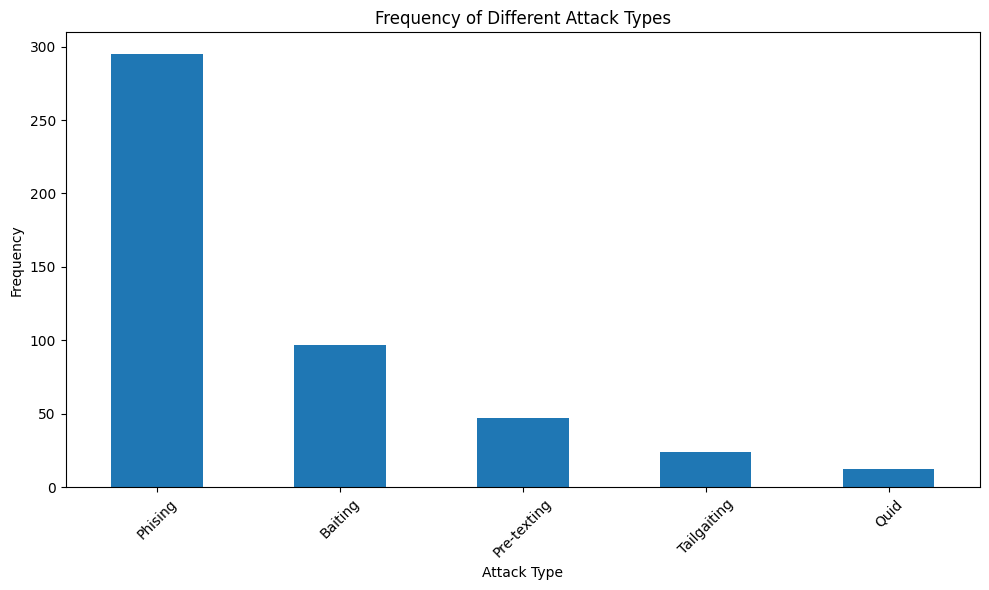

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Repeat the existing data to make it look like it has 500 references
#num_repeats = 5000 // len(data) + 1  # Calculate the number of times to repeat the data
#simulated_data = pd.concat([data] * num_repeats, ignore_index=True).sample(n=500)  # Concatenate and sample 500 rows

# Extract first three words from each attack type
simulated_data['Short Attack Type'] = simulated_data['Type of Attack'].str.split().str[:1].str.join(' ')

# Bar chart showing the frequency of different attack types
attack_type_counts = simulated_data['Short Attack Type'].value_counts()
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar')
plt.title('Frequency of Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('attack_type_bar_chart.png')  # Save the chart as an image
plt.show()
